In [42]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Changing Pendrell Sound $\Omega_A$ conditions in the SKØG model 

(c) TJŠJ, please don't share beyond: Susan, Debby, Chris, Iria
(preliminary results / experimental plots)

We've recently completed a series of experimental runs comparing carbonate chemistry in the Salish Sea under two scenarios:

    BR (BASE RUN / PRESENT DAY):
        present-day wind, 
        present-day temperature, 
        present-day tides, 
        present-day atmospheric carbon dioxide concentrations 
            (~409 uatm),
        present-day lateral boundary 
            (open Pacific Ocean) dissolved inorganic carbon 

    PI (PREINDUSTRIAL RUN):
        present-day wind, 
        present-day temperature, 
        present-day tides, 
        preindustrial atmospheric carbon dioxide concentrations 
            (~280 uatm),
        estimated preindustrial lateral boundary 
            (open Pacific Ocean) dissolved inorganic carbon 
        
Here, we contrast the conditions in Pendrell Sound the two scenarios, using $\Omega_A$ (aragonite saturation state) as a marker for habitat viability. Physical oceanographers and biogeochemists often think of $\Omega_A$>1 as viable habitat and $\Omega_A$<1 as corrosive habitat; ecologists know that it's more complicated than that. 

In [43]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [44]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pickle
import netCDF4 as nc
import numpy as np
import scipy as sp
import arrow 
import cmocean as cm
import warnings
warnings.filterwarnings('ignore')
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')

%matplotlib inline

### The benthic habitat in the Salish Sea

Here is a map of the benthic habitat in the Salish Sea, as seen by the SalishSeaCast model:

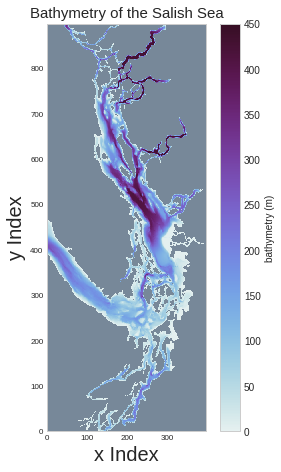

In [45]:
## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 15 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel)
fact = 0.25
plot_bathy(bath1,'Bathymetry of the Salish Sea', \
               cm.cm.dense,20*fact,30*fact,0,450,'bathymetry (m)','')

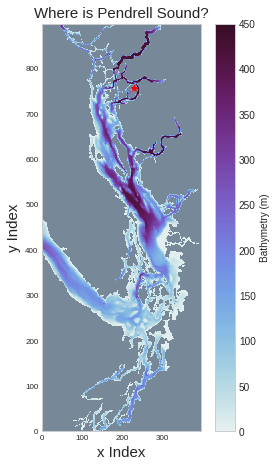

In [46]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
nav_lon = w['nav_lon'][:]
nav_lat = w['nav_lat'][:]
fact = 0.25
j, i = geo_tools.find_closest_model_point(-124.715, 50.270, nav_lon, nav_lat)


## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

fig, tax = plt.subplots(1, 1, figsize=(20*fact, 30*fact), sharey=True)
t_cmap = cm.cm.dense

#overview map
tplt = np.ma.masked_values(bath1,0)

tax.set_title('Where is Pendrell Sound?',fontsize = 15 )
viz_tools.set_aspect(tax)
mesh = tax.pcolormesh(tplt, cmap=t_cmap, vmin=0, vmax=450) 
tax.set_xlabel('x Index', fontsize = 15 )
tax.set_ylabel('y Index', fontsize = 15 )
tax.scatter(i,j, s = 40, marker = '*', color = 'red')
tax.set_xlim([0,398])
tax.set_ylim([0,898])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cbar = plt.colorbar(mesh)
cbar.set_label('Bathymetry (m)')
t_cmap.set_bad('lightslategray')


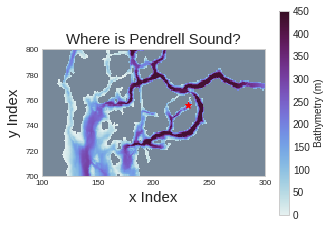

In [47]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
nav_lon = w['nav_lon'][:]
nav_lat = w['nav_lat'][:]
fact = 0.25
j, i = geo_tools.find_closest_model_point(-124.715, 50.270, nav_lon, nav_lat)


## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

fig, tax = plt.subplots(1, 1, figsize=(20*fact, 15*fact), sharey=True)
t_cmap = cm.cm.dense

#overview map
tplt = np.ma.masked_values(bath1,0)

tax.set_title('Where is Pendrell Sound?',fontsize = 15 )
viz_tools.set_aspect(tax)
mesh = tax.pcolormesh(tplt, cmap=t_cmap, vmin=0, vmax=450) 
tax.set_xlabel('x Index', fontsize = 15 )
tax.set_ylabel('y Index', fontsize = 15 )
tax.scatter(i,j, s = 40, marker = '*', color = 'red')
tax.set_xlim([100,300])
tax.set_ylim([700,800])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cbar = plt.colorbar(mesh)
cbar.set_label('Bathymetry (m)')
t_cmap.set_bad('lightslategray')


### Where is Pendrell Sound?

I am defining Pendrell Sound as 50.270 N, 124.715 W here. 

This corresponds to model point i: 231 and j: 756


In [48]:
i = 231; j = 756

## Random fortnights in Pendrell Sound

In [49]:
start ='2015-01-01'
end ='2015-01-14'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

dayslen = len(arrow_array)

oma_br = np.zeros([dayslen,40])
omc_br = np.zeros([dayslen,40])
oma_pi = np.zeros([dayslen,40])
omc_pi = np.zeros([dayslen,40])

for d in range(0,dayslen):

    tdate = arrow_array[d][0]
    ymd = tdate.format('YYYYMMDD')

    if d%10 == 0:
        print(ymd)
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_'+ymd+'.nc')
    oma_br[d,:] = t_pco2['model_output']['OmA'][:,j,i]
    omc_br[d,:] = t_pco2['model_output']['OmC'][:,j,i]
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI3_rr_OmA_plus_'+ymd+'.nc')
    oma_pi[d,:] = t_pco2['model_output']['OmA'][:,j,i]
    omc_pi[d,:] = t_pco2['model_output']['OmC'][:,j,i]
    
pickle.dump(oma_br, open("./extraction_pyscripts_and_intermediate_pickles/oma_br_PS_01jan-14jan.pkl", 'wb'))
pickle.dump(omc_br, open("./extraction_pyscripts_and_intermediate_pickles/omc_br_PS_01jan-14jan.pkl", 'wb'))
pickle.dump(oma_pi, open("./extraction_pyscripts_and_intermediate_pickles/oma_pi_PS_01jan-14jan.pkl", 'wb'))
pickle.dump(omc_pi, open("./extraction_pyscripts_and_intermediate_pickles/omc_pi_PS_01jan-14jan.pkl", 'wb'))

20150101
20150111


In [50]:
start ='2015-04-01'
end ='2015-04-14'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

dayslen = len(arrow_array)

oma_br = np.zeros([dayslen,40])
omc_br = np.zeros([dayslen,40])
oma_pi = np.zeros([dayslen,40])
omc_pi = np.zeros([dayslen,40])

for d in range(0,dayslen):

    tdate = arrow_array[d][0]
    ymd = tdate.format('YYYYMMDD')

    if d%10 == 0:
        print(ymd)
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_'+ymd+'.nc')
    oma_br[d,:] = t_pco2['model_output']['OmA'][:,j,i]
    omc_br[d,:] = t_pco2['model_output']['OmC'][:,j,i]
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI3_rr_OmA_plus_'+ymd+'.nc')
    oma_pi[d,:] = t_pco2['model_output']['OmA'][:,j,i]
    omc_pi[d,:] = t_pco2['model_output']['OmC'][:,j,i]
    
pickle.dump(oma_br, open("./extraction_pyscripts_and_intermediate_pickles/oma_br_PS_01apr-14apr.pkl", 'wb'))
pickle.dump(omc_br, open("./extraction_pyscripts_and_intermediate_pickles/omc_br_PS_01apr-14apr.pkl", 'wb'))
pickle.dump(oma_pi, open("./extraction_pyscripts_and_intermediate_pickles/oma_pi_PS_01apr-14apr.pkl", 'wb'))
pickle.dump(omc_pi, open("./extraction_pyscripts_and_intermediate_pickles/omc_pi_PS_01apr-14apr.pkl", 'wb'))

20150401
20150411


In [51]:
start ='2015-07-01'
end ='2015-07-14'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

dayslen = len(arrow_array)

oma_br = np.zeros([dayslen,40])
omc_br = np.zeros([dayslen,40])
oma_pi = np.zeros([dayslen,40])
omc_pi = np.zeros([dayslen,40])

for d in range(0,dayslen):

    tdate = arrow_array[d][0]
    ymd = tdate.format('YYYYMMDD')

    if d%10 == 0:
        print(ymd)
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_'+ymd+'.nc')
    oma_br[d,:] = t_pco2['model_output']['OmA'][:,j,i]
    omc_br[d,:] = t_pco2['model_output']['OmC'][:,j,i]
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI3_rr_OmA_plus_'+ymd+'.nc')
    oma_pi[d,:] = t_pco2['model_output']['OmA'][:,j,i]
    omc_pi[d,:] = t_pco2['model_output']['OmC'][:,j,i]
    
pickle.dump(oma_br, open("./extraction_pyscripts_and_intermediate_pickles/oma_br_PS_01jul-14jul.pkl", 'wb'))
pickle.dump(omc_br, open("./extraction_pyscripts_and_intermediate_pickles/omc_br_PS_01jul-14jul.pkl", 'wb'))
pickle.dump(oma_pi, open("./extraction_pyscripts_and_intermediate_pickles/oma_pi_PS_01jul-14jul.pkl", 'wb'))
pickle.dump(omc_pi, open("./extraction_pyscripts_and_intermediate_pickles/omc_pi_PS_01jul-14jul.pkl", 'wb'))

20150701
20150711


In [52]:
start ='2015-10-01'
end ='2015-10-14'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

dayslen = len(arrow_array)

oma_br = np.zeros([dayslen,40])
omc_br = np.zeros([dayslen,40])
oma_pi = np.zeros([dayslen,40])
omc_pi = np.zeros([dayslen,40])

for d in range(0,dayslen):

    tdate = arrow_array[d][0]
    ymd = tdate.format('YYYYMMDD')

    if d%10 == 0:
        print(ymd)
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_'+ymd+'.nc')
    oma_br[d,:] = t_pco2['model_output']['OmA'][:,j,i]
    omc_br[d,:] = t_pco2['model_output']['OmC'][:,j,i]
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI3_rr_OmA_plus_'+ymd+'.nc')
    oma_pi[d,:] = t_pco2['model_output']['OmA'][:,j,i]
    omc_pi[d,:] = t_pco2['model_output']['OmC'][:,j,i]
    
pickle.dump(oma_br, open("./extraction_pyscripts_and_intermediate_pickles/oma_br_PS_01oct-14oct.pkl", 'wb'))
pickle.dump(omc_br, open("./extraction_pyscripts_and_intermediate_pickles/omc_br_PS_01oct-14oct.pkl", 'wb'))
pickle.dump(oma_pi, open("./extraction_pyscripts_and_intermediate_pickles/oma_pi_PS_01oct-14oct.pkl", 'wb'))
pickle.dump(omc_pi, open("./extraction_pyscripts_and_intermediate_pickles/omc_pi_PS_01oct-14oct.pkl", 'wb'))

20151001
20151011


In [53]:
oma_br_PS_01oct = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/oma_br_PS_01oct-14oct.pkl', 'rb'))  
oma_pi_PS_01oct = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/oma_pi_PS_01oct-14oct.pkl', 'rb'))  
omc_br_PS_01oct = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/omc_br_PS_01oct-14oct.pkl', 'rb'))  
omc_pi_PS_01oct = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/omc_pi_PS_01oct-14oct.pkl', 'rb'))

oma_br_PS_01jan = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/oma_br_PS_01jan-14jan.pkl', 'rb'))  
oma_pi_PS_01jan = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/oma_pi_PS_01jan-14jan.pkl', 'rb'))  
omc_br_PS_01jan = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/omc_br_PS_01jan-14jan.pkl', 'rb'))  
omc_pi_PS_01jan = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/omc_pi_PS_01jan-14jan.pkl', 'rb'))

oma_br_PS_01apr = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/oma_br_PS_01apr-14apr.pkl', 'rb'))  
oma_pi_PS_01apr = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/oma_pi_PS_01apr-14apr.pkl', 'rb'))  
omc_br_PS_01apr = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/omc_br_PS_01apr-14apr.pkl', 'rb'))  
omc_pi_PS_01apr = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/omc_pi_PS_01apr-14apr.pkl', 'rb'))

oma_br_PS_01jul = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/oma_br_PS_01jul-14jul.pkl', 'rb'))  
oma_pi_PS_01jul = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/oma_pi_PS_01jul-14jul.pkl', 'rb'))  
omc_br_PS_01jul = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/omc_br_PS_01jul-14jul.pkl', 'rb'))  
omc_pi_PS_01jul = pickle.load(open('./extraction_pyscripts_and_intermediate_pickles/omc_pi_PS_01jul-14jul.pkl', 'rb'))




## January 1 - Jan 14

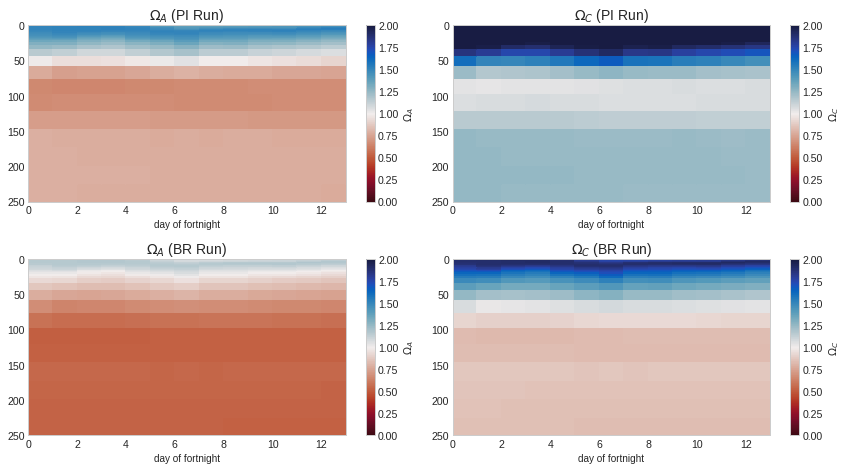

In [54]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fwk = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_ptrc_T_20190101-20190101.nc')
zlevels = (fwk['deptht'][:])

tplt1 = oma_pi_PS_01jan
tplt2 = omc_pi_PS_01jan
tplt3 = oma_br_PS_01jan
tplt4 = omc_br_PS_01jan

ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((3,4), (0,0), colspan=2, rowspan=1)
ax1.set_title('$\Omega_A$ (PI Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax1.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt1), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax1)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('day of fortnight')
ax1.set_ylim([0,250])
ax1.invert_yaxis()

ax2 = plt.subplot2grid((3,4), (0,2), colspan=2, rowspan=1)

ax2.set_title('$\Omega_C$ (PI Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax2.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt2), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax2)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_C$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('day of fortnight')
ax2.set_ylim([0,250])
ax2.invert_yaxis()

ax3 = plt.subplot2grid((3,4), (1,0), colspan=2, rowspan=1)
ax3.set_title('$\Omega_A$ (BR Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax3.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt3), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax3)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('day of fortnight')
ax3.set_ylim([0,250])
ax3.invert_yaxis()

ax4 = plt.subplot2grid((3,4), (1,2), colspan=2, rowspan=1)
ax4.set_title('$\Omega_C$ (BR Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax4.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt4), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax4)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_C$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('day of fortnight')
ax4.set_ylim([0,250])
ax4.invert_yaxis()
  
fig.tight_layout()

# Apr 1 - Apr 14

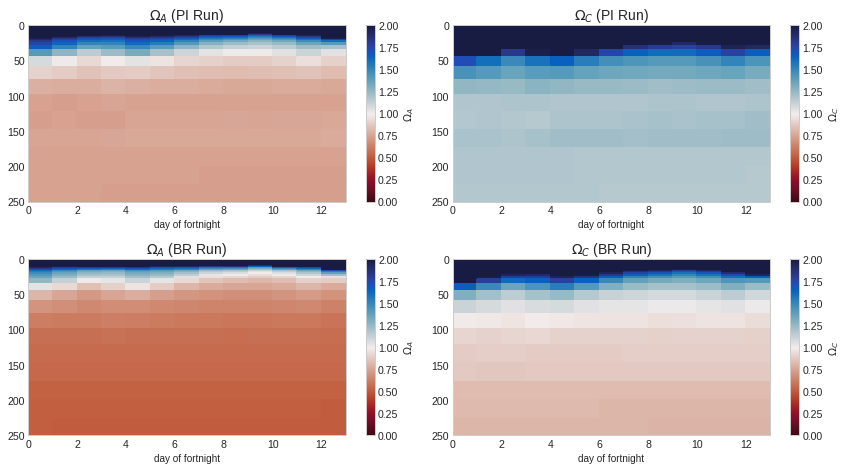

In [55]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fwk = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_ptrc_T_20190101-20190101.nc')
zlevels = (fwk['deptht'][:])

tplt1 = oma_pi_PS_01apr
tplt2 = omc_pi_PS_01apr
tplt3 = oma_br_PS_01apr
tplt4 = omc_br_PS_01apr

ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((3,4), (0,0), colspan=2, rowspan=1)
ax1.set_title('$\Omega_A$ (PI Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax1.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt1), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax1)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('day of fortnight')
ax1.set_ylim([0,250])
ax1.invert_yaxis()

ax2 = plt.subplot2grid((3,4), (0,2), colspan=2, rowspan=1)

ax2.set_title('$\Omega_C$ (PI Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax2.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt2), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax2)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_C$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('day of fortnight')
ax2.set_ylim([0,250])
ax2.invert_yaxis()

ax3 = plt.subplot2grid((3,4), (1,0), colspan=2, rowspan=1)
ax3.set_title('$\Omega_A$ (BR Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax3.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt3), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax3)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('day of fortnight')
ax3.set_ylim([0,250])
ax3.invert_yaxis()

ax4 = plt.subplot2grid((3,4), (1,2), colspan=2, rowspan=1)
ax4.set_title('$\Omega_C$ (BR Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax4.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt4), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax4)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_C$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('day of fortnight')
ax4.set_ylim([0,250])
ax4.invert_yaxis()
  
fig.tight_layout()

# July 1 - 14

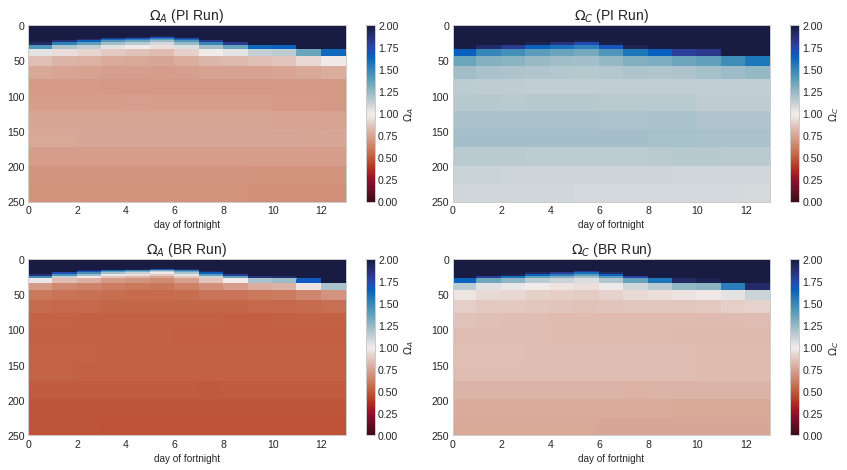

In [56]:
tplt1 = oma_pi_PS_01jul
tplt2 = omc_pi_PS_01jul
tplt3 = oma_br_PS_01jul
tplt4 = omc_br_PS_01jul

bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fwk = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_ptrc_T_20190101-20190101.nc')
zlevels = (fwk['deptht'][:])



ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((3,4), (0,0), colspan=2, rowspan=1)
ax1.set_title('$\Omega_A$ (PI Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax1.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt1), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax1)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('day of fortnight')
ax1.set_ylim([0,250])
ax1.invert_yaxis()

ax2 = plt.subplot2grid((3,4), (0,2), colspan=2, rowspan=1)

ax2.set_title('$\Omega_C$ (PI Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax2.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt2), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax2)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_C$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('day of fortnight')
ax2.set_ylim([0,250])
ax2.invert_yaxis()

ax3 = plt.subplot2grid((3,4), (1,0), colspan=2, rowspan=1)
ax3.set_title('$\Omega_A$ (BR Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax3.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt3), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax3)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('day of fortnight')
ax3.set_ylim([0,250])
ax3.invert_yaxis()

ax4 = plt.subplot2grid((3,4), (1,2), colspan=2, rowspan=1)
ax4.set_title('$\Omega_C$ (BR Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax4.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt4), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax4)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_C$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('day of fortnight')
ax4.set_ylim([0,250])
ax4.invert_yaxis()
  
fig.tight_layout()

# October 1 - 14

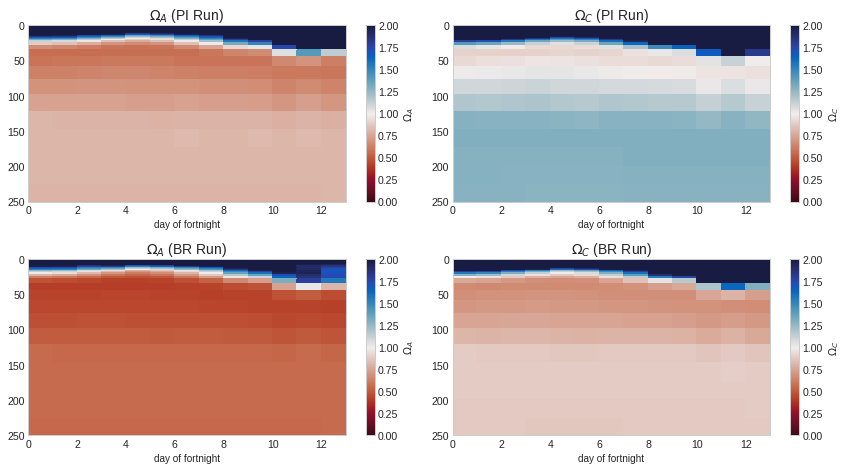

In [57]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fwk = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_ptrc_T_20190101-20190101.nc')
zlevels = (fwk['deptht'][:])

tplt1 = oma_pi_PS_01oct
tplt2 = omc_pi_PS_01oct
tplt3 = oma_br_PS_01oct
tplt4 = omc_br_PS_01oct

ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((3,4), (0,0), colspan=2, rowspan=1)
ax1.set_title('$\Omega_A$ (PI Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax1.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt1), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax1)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('day of fortnight')
ax1.set_ylim([0,250])
ax1.invert_yaxis()

ax2 = plt.subplot2grid((3,4), (0,2), colspan=2, rowspan=1)

ax2.set_title('$\Omega_C$ (PI Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax2.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt2), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax2)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_C$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('day of fortnight')
ax2.set_ylim([0,250])
ax2.invert_yaxis()

ax3 = plt.subplot2grid((3,4), (1,0), colspan=2, rowspan=1)
ax3.set_title('$\Omega_A$ (BR Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax3.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt3), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax3)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('day of fortnight')
ax3.set_ylim([0,250])
ax3.invert_yaxis()

ax4 = plt.subplot2grid((3,4), (1,2), colspan=2, rowspan=1)
ax4.set_title('$\Omega_C$ (BR Run)',fontsize = ts)
section_slice = np.arange(0, 14)
mesh = ax4.pcolormesh(section_slice[:],zlevels[:],np.transpose(tplt4), cmap = cm.cm.balance_r, vmin=0, vmax=2)
cbar = fig.colorbar(mesh, ax=ax4)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_C$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('day of fortnight')
ax4.set_ylim([0,250])
ax4.invert_yaxis()
  
fig.tight_layout()